In [1]:
from sklearn.datasets import load_iris

<p>In the above dataset contains samples of iris plants,where each sample consist of 4 features.ie,<i>sepal length,sepal width,petal length ,petal width</i>.</p>
<p>The target variable represents the species of iris plant,it consist of <i>Setosa,Versicolour & Virginica</i>.</p>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [3]:
#step 1 Load the iris dataset
iris_data = load_iris()
x=iris_data.data     #feature
y=iris_data.target   #target variable

In [4]:
#step 2 :Explore and understand the dataset

#print the feature names
print("Feature names :",iris_data.feature_names)

#print the target names
print("Feature names :",iris_data.target_names)

#print the shape of dataset
print("Shape of features :",x.shape)
print("Shape of target :",y.shape)

Feature names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature names : ['setosa' 'versicolor' 'virginica']
Shape of features : (150, 4)
Shape of target : (150,)


In [5]:
#convert the features & target into a DataFrame for easier exploration
iris_df = pd.DataFrame(data=x, columns=iris_data.feature_names)
iris_df['species'] = y #add the target variable to the dataframe
iris_df['species'] = iris_df['species'].map({0: 'Setosa',1: 'Versicolour',2: 'Virginica'})  

In [6]:
#print descriptive statistics of the features
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
print("Descriptive statistics of features:")
print(iris_df.describe)

Descriptive statistics of features:
<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1             

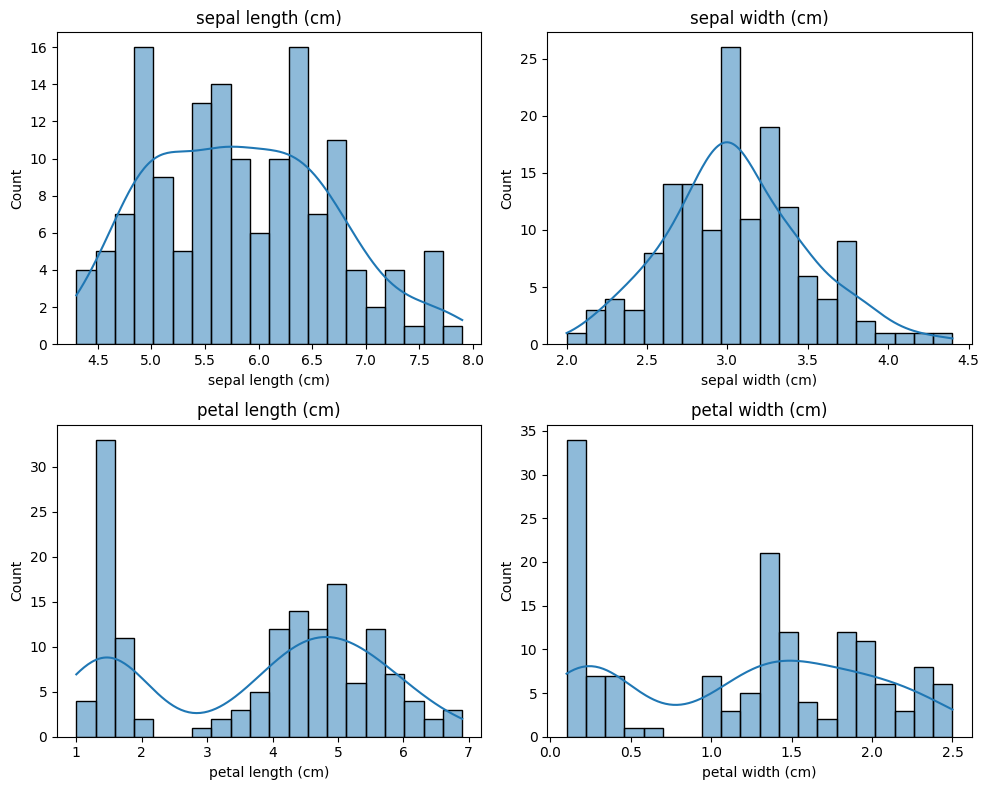

In [7]:
plt.figure(figsize=(10,8))
for i,feature in enumerate(iris_data.feature_names):
    plt.subplot(2,2,i+1)
    sns.histplot(iris_df[feature],bins=20,kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

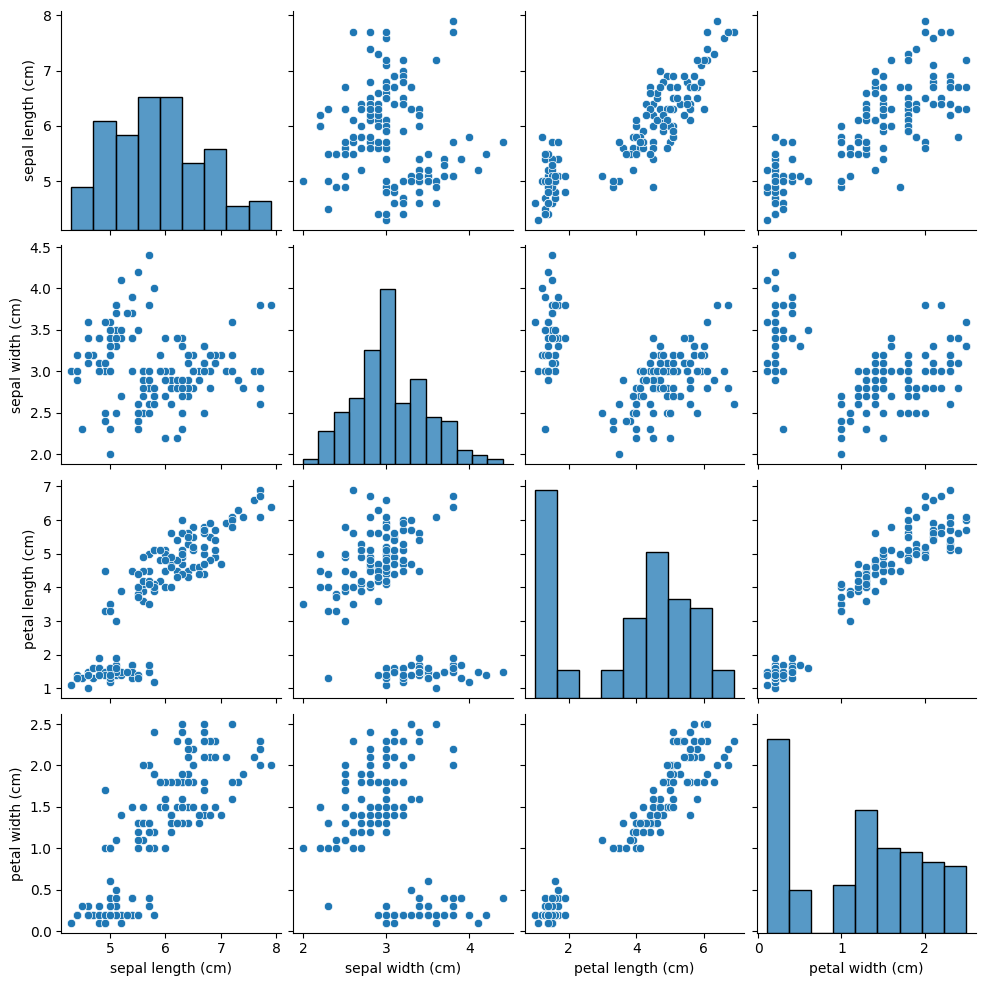

In [8]:
#visualize the relationship between features using pairplot
sns.pairplot(iris_df)
plt.show()

<p>No preprocessing required for this dataset.</p>

### Logistic Regression

In [10]:
#step 3: split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

#split the dataset into 80% training & 20% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#print the shapes of the training and testing sets
print("shape of x_train:",x_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_train:",y_train.shape)
print("shape of y_test:",y_test.shape)

 

shape of x_train: (120, 4)
shape of x_test: (30, 4)
shape of y_train: (120,)
shape of y_test: (30,)


In [11]:
#step 4
#initialize the logistic regression model
logistic_reg_model = LogisticRegression(max_iter=1000)

#Train the model on the training data
logistic_reg_model.fit(x_train,y_train)

print("Logistic Regression Model trained successfully");

Logistic Regression Model trained successfully


In [12]:
#step 5:Evaluate Model Accuracy
from sklearn.metrics import accuracy_score

#Make predictions on the testing data
y_pred = logistic_reg_model.predict(x_test)

#calculate accuracy score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of Logistic Regression Model:",accuracy)


Accuracy of Logistic Regression Model: 1.0


In [13]:
#step 6:Predict New Samples
#Assume 'new_samples' contains features of different samples from the test dataset
new_samples = x_test[:5] #example: predicting the first 5 samples from the test dataset

#Use the trained Logistic regression model to predict the classes of new samples
predicted_classes = logistic_reg_model.predict(new_samples)

#Map predicted class indices to species names
predicted_species = [iris_data.target_names[class_index] for class_index in predicted_classes]

#print the predicted classes
print("Predicted classes of new samples:" )
for i,sample in enumerate(new_samples):
    print(f"sample {i+1}: Feature={sample}, Predicted Class={predicted_species[i]}")



Predicted classes of new samples:
sample 1: Feature=[6.1 2.8 4.7 1.2], Predicted Class=versicolor
sample 2: Feature=[5.7 3.8 1.7 0.3], Predicted Class=setosa
sample 3: Feature=[7.7 2.6 6.9 2.3], Predicted Class=virginica
sample 4: Feature=[6.  2.9 4.5 1.5], Predicted Class=versicolor
sample 5: Feature=[6.8 2.8 4.8 1.4], Predicted Class=versicolor


### Clustering

In [15]:
#Step 1: Clustering
from sklearn.cluster import KMeans

#Initialize KMeans with 3 clusters (since there are 3 species)
kmeans = KMeans(n_clusters=3,random_state=42)

#Fit KMeans to the data (excluding target variable)
kmeans.fit(x)

#Get cluster centers and Labels
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

#Print cluster centers and labels
print("Cluster Centers:")
print(cluster_centers)
print("\nCluster Labels:")
print(cluster_labels)




Cluster Centers:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]

Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


<P>In this code,we declare KMeans Clustering model with 3 clusters.ie,3 species of iris flower.Then we fit KMeans model to the data(remove the target variable).Result is cluster centers & tables.</P>

### Classification

In [20]:
#step 2:Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Initialize classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=100,random_state=42)
svm_classifier = SVC(kernel='linear',random_state=42)

#Train classifier on the training data
decision_tree.fit(x_train,y_train)
random_forest.fit(x_train,y_train)
svm_classifier.fit(x_train,y_train)

#Evaluate classifiers on the testing data
decision_tree_accuracy = decision_tree.score(x_test,y_test)
random_forest_accuracy = random_forest.score(x_test,y_test)
svm_accuracy = svm_classifier.score(x_test,y_test)


#print accuracy scores
print("Accuracy of Decision Tree Classifier:",decision_tree_accuracy)
print("Accuracy of Random Forest Classifier:",random_forest_accuracy)
print("Accuracy of SVM Classifier:",svm_accuracy)



Accuracy of Decision Tree Classifier: 1.0
Accuracy of Random Forest Classifier: 1.0
Accuracy of SVM Classifier: 1.0


<p>Here we declare decision tree,random forest and Support vector machine classifiers.Then we train the classifiers on the training data(x_train,y_train).</p>
<p>Then we evaluate the accuracy of each classifier on testing data(x_test,y_test) using the score method.Finally we print the accuracy scores of each classifier.</p>